In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("df_2_year_window.csv")

C:\Users\Ethan D\AppData\Local\Temp\ipykernel_6832\2210787411.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_2_year_window.csv")


In [125]:
df.sample(10)

,rating,title,status,pros,cons,date,job,company_name,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,company_size,eu_status,founded_year,under_gdpr,industry,seniority_level,month,full_review
1233689,4.0,Great company,Current Employee,"When I first started Nestle, it felt like a fa...",Nestle has turned into a millennial hub where ...,2017-06-26,Anonymous Employee,Nestl%C3%A9,0.5,-1.0,1.0,Large,Non-EU,1866,Yes,Food & Beverage,Senior,2017-06,"Great company When I first started Nestle, it ..."
2139718,5.0,Cook,"Current Employee, more than 1 year","Fun, challenging , and great company in genera...","Bad pay , hit or miss with quality of stores(m...",2016-11-06,Cook,Qdoba,0.5,1.0,1.0,Large,Non-EU,1995,No,Food & Beverage,Junior,2016-11,"Cook Fun, challenging , and great company in g..."
2122871,3.0,Great environment to learn but low salaryu,"Current Employee, less than 1 year","Learn and develop, practice English","Salary, distance to go to work, excessive hour...",2019-11-05,Project Analyst,FCA Fiat Chrysler Automobiles,0.5,0.5,1.0,Large,Non-EU,1899,Yes,Automotive,Junior,2019-11,Great environment to learn but low salaryu Lea...
207038,4.0,Working as a Day Baker,Current Employee,I actually like my job as a baker. It can get ...,You are left on your own after training. Manag...,2017-01-08,Day Baker,Panera Bread,0.0,0.0,1.0,Large,Non-EU,1987,Yes,Food & Beverage,Senior,2017-01,Working as a Day Baker I actually like my job ...
1452694,5.0,Director,"Former Employee, more than 5 years",Best Company in the world in it's category,"Nothing specifically, all is wal(well)",2018-05-15,Director,Walmart,1.0,1.0,1.0,Large,Non-EU,1962,Yes,Retail,Senior,2018-05,Director Best Company in the world in it's cat...
1042096,1.0,Awful,Former Employee,Employee Discount was the only good take away.,Everyone was catty and offensive.,2018-07-09,Anonymous Employee,LUSH North America,0.5,-1.0,-1.0,Large,Non-EU,1996,No,Beauty & Cosmetics,Senior,2018-07,Awful Employee Discount was the only good take...
1072477,5.0,Sr Systems Engineer,"Former Employee, more than 5 years","Lots of opportunity, best place to work if you...",Depends upon the immediate manager.,2016-07-13,Lead Systems Engineer,GE,1.0,1.0,1.0,Large,Non-EU,1892,No,Electronics & Manufacturing,Senior,2016-07,"Sr Systems Engineer Lots of opportunity, best ..."
1960680,5.0,Good place to work,"Current Employee, less than 1 year",Nice environment to work with,Not yet may let you know later,2019-10-03,Anonymous Employee,LTI,1.0,1.0,1.0,Large,Non-EU,1997,Yes,IT & Software,Junior,2019-10,Good place to work Nice environment to work w...
879538,4.0,Overall decent employer,"Former Employee, more than 1 year","Regular customers, steady work, great FMLA","Drama like high school, takes too long for rev...",2020-04-10,Shift Supervisor,Rite Aid,0.0,0.0,1.0,Large,Non-EU,1962,No,Healthcare,Junior,2020-04,"Overall decent employer Regular customers, ste..."
1970190,3.0,OK Type,"Former Employee, more than 10 years","Training & Learning, Good for staring Career.","Bad Salary, Oiling to immediate superior.",2017-04-04,Industry Manager,Larsen & Toubro,0.0,0.0,1.0,Large,Non-EU,1938,No,Construction & Engineering,Senior,2017-04,"OK Type Training & Learning, Good for staring ..."


In [126]:
# Define target firms (make sure these match exactly what's in your data)
target_firms = ['Amazon', 'Deloitte', 'PwC', 'EY', 'KPMG']

# Filter the DataFrame to those firms
filtered_df = df[df['company_name'].isin(target_firms)]

# Count the reviews per company
target_review_counts = filtered_df['company_name'].value_counts()

print(target_review_counts)


company_name
Amazon      29680
PwC         13257
Deloitte     9335
KPMG         9221
EY           7946
Name: count, dtype: int64


In [15]:
print(df.isnull().sum())


rating                           0
title                         3335
status                           0
pros                             0
cons                             0
date                             0
job                              0
company_name                     0
CEO_Approval_Sentiment           0
Business_Outlook_Sentiment       0
Recommmend_sentiment             0
company_size                     0
eu_status                        0
founded_year                     0
under_gdpr                       0
industry                         0
seniority_level                  0
month                            0
dtype: int64


In [12]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows.head(20))


       rating title                               status  \
963       3.0   NaN   Current Employee, less than 1 year   
989       3.0   NaN    Former Employee, more than 1 year   
1012      2.0   NaN    Former Employee, less than 1 year   
2197      3.0   NaN   Former Employee, more than 3 years   
3053      3.0   NaN   Former Employee, more than 3 years   
3165      4.0   NaN                     Current Employee   
4618      3.0   NaN                      Former Employee   
6435      3.0   NaN                     Current Employee   
7645      4.0   NaN    Former Employee, more than 1 year   
8352      5.0   NaN                      Former Employee   
10161     4.0   NaN   Current Employee, less than 1 year   
10484     5.0   NaN   Former Employee, more than 3 years   
10563     5.0   NaN  Current Employee, more than 3 years   
11542     2.0   NaN   Former Employee, more than 8 years   
12664     3.0   NaN                     Current Employee   
12865     3.0   NaN   Current Employee, 

In [5]:
# Assign 'EU' to all rows where company_name is 'Swarovski' and eu_status is missing
df.loc[(df['company_name'] == 'Swarovski') & (df['eu_status'].isnull()), 'eu_status'] = 'EU'


In [8]:
# Get all rows where eu_status is missing
missing_eu_status = df[df['eu_status'].isnull()]

# Get unique company names from those rows
missing_companies = missing_eu_status['company_name'].unique()

# Display them
print(missing_companies)


['Brown University' 'RH' 'ABM Industries' 'Colorado State University'
 'Duke University' 'GE Aerospace' 'Magellan Health' 'Harvard University'
 'Lionbridge' 'University of Toronto' 'Universitas Gadjah Mada' 'Paycom'
 'Pier 1 Imports' 'University of Arizona' 'Fossil Group'
 'Nanyang Technological University' 'Free People' 'Stanford University'
 'University of Missouri' 'Quad' 'SkyWest Airlines'
 'Est%C3%A9e Lauder Companies' 'Government of India' 'UC Santa Barbara'
 'Aramark' 'UC San Diego' 'Iowa State University' 'Caff%C3%A8 Nero'
 'Clemson University' 'ISS Facility Services' 'Indian Oil' 'Bell'
 'University of Pennsylvania' 'WTW' 'NICE' 'Luxottica'
 'Universal Orlando Resort' 'Oklahoma State University'
 'Princeton University' 'Tulane University' 'ADP' 'Oxford University'
 'Government of Canada' 'Mondel%C4%93z International' 'Amdocs'
 'Imperial College London' 'University of Calgary' 'University of Florida'
 'McMaster University' 'Dentsu International' 'Associa' 'BMO US'
 'Rice Univer

In [13]:
# Dictionary mapping company names to EU status
eu_classification = {
    'Brown University': 'Non-EU',
    'RH': 'Non-EU',
    'ABM Industries': 'Non-EU',
    'Colorado State University': 'Non-EU',
    'Duke University': 'Non-EU',
    'GE Aerospace': 'Non-EU',
    'Magellan Health': 'Non-EU',
    'Harvard University': 'Non-EU',
    'Lionbridge': 'Non-EU',
    'University of Toronto': 'Non-EU',
    'Universitas Gadjah Mada': 'Non-EU',
    'Paycom': 'Non-EU',
    'Pier 1 Imports': 'Non-EU',
    'University of Arizona': 'Non-EU',
    'Fossil Group': 'Non-EU',
    'Nanyang Technological University': 'Non-EU',
    'Free People': 'Non-EU',
    'Stanford University': 'Non-EU',
    'University of Missouri': 'Non-EU',
    'Quad': 'Non-EU',
    'SkyWest Airlines': 'Non-EU',
    'Est%C3%A9e Lauder Companies': 'Non-EU',
    'Government of India': 'Non-EU',
    'UC Santa Barbara': 'Non-EU',
    'Aramark': 'Non-EU',
    'UC San Diego': 'Non-EU',
    'Iowa State University': 'Non-EU',
    'Caff%C3%A8 Nero': 'EU',
    'Clemson University': 'Non-EU',
    'ISS Facility Services': 'EU',
    'Indian Oil': 'Non-EU',
    'Bell': 'Non-EU',
    'University of Pennsylvania': 'Non-EU',
    'WTW': 'EU',
    'NICE': 'Non-EU',
    'Luxottica': 'EU',
    'Universal Orlando Resort': 'Non-EU',
    'Oklahoma State University': 'Non-EU',
    'Princeton University': 'Non-EU',
    'Tulane University': 'Non-EU',
    'ADP': 'Non-EU',
    'Oxford University': 'EU',
    'Government of Canada': 'Non-EU',
    'Mondel%C4%93z International': 'Non-EU',
    'Amdocs': 'Non-EU',
    'Imperial College London': 'EU',
    'University of Calgary': 'Non-EU',
    'University of Florida': 'Non-EU',
    'McMaster University': 'Non-EU',
    'Dentsu International': 'Non-EU',
    'Associa': 'Non-EU',
    'BMO US': 'Non-EU',
    'Rice University': 'Non-EU',
    'Smith and Nephew': 'EU',
    'Self Opportunity': 'Non-EU',
    'RSM': 'EU',
    'Fiverr Inc': 'Non-EU',
    'Peet s': 'Non-EU',
    'Linde': 'EU',
    'CR England': 'Non-EU',
    'R1 RCM': 'Non-EU',
    'IQVIA': 'Non-EU',
    'Georgia Tech': 'Non-EU',
    'Scribe America': 'Non-EU',
    'Levi Strauss': 'Non-EU',
    'AIESEC': 'EU',
    'MITRE': 'Non-EU',
    'Boston University': 'Non-EU',
    'Hard Rock International': 'Non-EU',
    'Cornell University': 'Non-EU',
    'Ceridian': 'Non-EU',
    'UC Davis': 'Non-EU',
    'British Council': 'EU',
    'University of Notre Dame': 'Non-EU',
    'Books A Million': 'Non-EU',
    'Anheuser Busch InBev': 'EU',
    'Greene King': 'EU',
    'LifeWorks': 'Non-EU',
    'MilliporeSigma': 'Non-EU',
    'Stanley Black & Decker': 'Non-EU',
    'Equifax': 'Non-EU',
    'University of Michigan': 'Non-EU',
    'Rutgers University': 'Non-EU',
    'Red Bull': 'EU',
    'Sheetz': 'Non-EU'
}

# Apply the classification to the 'eu_status' column
df['eu_status'] = df['company_name'].map(eu_classification).fillna(df['eu_status'])


In [14]:
df.sample(50)

,rating,title,status,pros,cons,date,job,company_name,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,company_size,eu_status,founded_year,under_gdpr,industry,seniority_level,month
738253,3.0,senior brand manager,"Current Employee, less than 1 year","commercial, business, procedures, collaborativ...","anxiety, worry, too many to marketing, not agile,",2018-04-12,Anonymous Employee,Unilever,0.0,0.0,0.0,Large,EU,1929,Yes,Other,Junior,2018-04
652924,3.0,Cashier,"Former Employee, less than 1 year",-Job duties aren't too difficult to master\r\n...,-Not enough employees on the floor\r\n-Pointle...,2018-04-23,Sales Associate/Cashier,CVS Health,0.0,-1.0,-1.0,Large,Non-EU,1963,Yes,Healthcare,Junior,2018-04
607323,5.0,Outstanding place to work and eat. We take gre...,"Former Employee, less than 1 year",Management at my store 2504 S. Orange Avenue o...,"I enjoyed the work, Just didnt like cleaning u...",2018-01-15,Maintenance,McDonald s,1.0,1.0,1.0,Large,Non-EU,1940,Yes,Food & Beverage,Junior,2018-01
1058873,3.0,Sales Associate,Former Employee,"Friendly staff, amazing employee discount",Stressful to have to meet hourly/daily sales q...,2018-12-20,,Charlotte Russe,0.0,0.0,0.0,Large,Non-EU,1975,No,Retail,Senior,2018-12
1163236,4.0,Great place to work at,"Former Employee, more than 3 years",Very flexible during my time in college. They ...,Pay was a bit confusing at first as a dog trai...,2019-08-29,Dog Trainer,Petco,0.5,1.0,1.0,Large,Non-EU,1965,No,Retail,Mid-Level,2019-08
1601526,4.0,Entry Level Data Entry - US Customs Brokerage,"Former Employee, more than 10 years","Great benefits, interesting work, growth oppor...",Like most offices there are “politics” involve...,2019-06-15,ECO Import Coordinator,FedEx,0.0,1.0,1.0,Large,Non-EU,1971,Yes,Logistics & Transport,Senior,2019-06
701507,3.0,Okay,Former Employee,The discount and the pay was decent,managers don't care about 2 deaths that happen...,2018-01-29,,Victoria s Secret,0.0,0.0,0.0,Large,Non-EU,1977,Yes,Retail,Senior,2018-01
76471,2.0,Lead Teacher,Current Employee,Great staff (when they stick around for over o...,Oh man. Where do I begin? The administrative t...,2018-12-03,Anonymous Employee,The Goddard School,-1.0,-1.0,-1.0,Large,Non-EU,1988,No,Education,Senior,2018-12
1432338,3.0,Department manager,"Former Employee, more than 5 years",Working is the way of life to get things you n...,It take away time from your family,2018-02-05,Department Manager,Walmart,0.5,0.5,1.0,Large,Non-EU,1962,Yes,Retail,Senior,2018-02
1114383,3.0,Good company overall,Current Employee,"Location , management is very approachable. Th...","Location, long days, parking can be a bit hard...",2019-05-06,Technical Project Manager,The Coca Cola Company,0.0,0.0,0.0,Large,Non-EU,1886,Yes,Food & Beverage,Senior,2019-05


In [16]:
df.to_csv("df_2_year_window_complete.csv", index=False)


In [17]:
print(df.columns)

Index(['rating', 'title', 'status', 'pros', 'cons', 'date', 'job',
       'company_name', 'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment',
       'Recommmend_sentiment', 'company_size', 'eu_status', 'founded_year',
       'under_gdpr', 'industry', 'seniority_level', 'month'],
      dtype='object')


In [18]:
# Merge the columns into a new column called 'full_review'
df['full_review'] = df[['title', 'pros', 'cons']].astype(str).agg(' '.join, axis=1)

# Drop the original columns
df_new = df.drop(['title', 'pros', 'cons'], axis=1)

# Optional: Save to a new CSV if needed
# df_new.to_csv("df_sentiment_ready.csv", index=False)

# Display the new structure
print(df_new.columns)
print(df_new[['full_review']].head())


Index(['rating', 'status', 'date', 'job', 'company_name',
       'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment',
       'Recommmend_sentiment', 'company_size', 'eu_status', 'founded_year',
       'under_gdpr', 'industry', 'seniority_level', 'month', 'full_review'],
      dtype='object')
                                         full_review
0  DON'T WORK HERE Low pay, poor treatment, hosti...
1  Fair Warning to Prospective Consultants - GWL ...
2  Best to avoid this place! Depends a lot on whi...
3  lead teacher great coworkers and program direc...
4  A State of Change Fitness Center (Winnipeg, Lo...


In [19]:
print(df_new.isnull().sum())

rating                        0
status                        0
date                          0
job                           0
company_name                  0
CEO_Approval_Sentiment        0
Business_Outlook_Sentiment    0
Recommmend_sentiment          0
company_size                  0
eu_status                     0
founded_year                  0
under_gdpr                    0
industry                      0
seniority_level               0
month                         0
full_review                   0
dtype: int64


In [20]:
 #df_new.to_csv("df_sentiment_fullreview_ready.csv", index=False)


In [21]:
df.sample(20)

,rating,title,status,pros,cons,date,job,company_name,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,company_size,eu_status,founded_year,under_gdpr,industry,seniority_level,month,full_review
629854,4.0,Easy interview,Former Employee,Applied and was hired in less than a week,Co-workers had poor work ethics,2017-09-25,Anonymous Employee,Macy's,1.0,1.0,1.0,Large,Non-EU,1858,Yes,Retail,Senior,2017-09,Easy interview Applied and was hired in less t...
1453395,4.0,Great Team,"Current Employee, more than 1 year",Flexible hours - Big Company - Great Team,Minimum Wages at Walmart Canada,2020-02-23,Associate,Walmart,1.0,1.0,1.0,Large,Non-EU,1962,Yes,Retail,Junior,2020-02,Great Team Flexible hours - Big Company - Grea...
1222213,5.0,anailizing business systems and operations,"Current Employee, less than 1 year","environment, ethics, and lastly, colleagues.",I dont have any primary cons.,2020-02-08,Business Analyst,RBC,1.0,1.0,1.0,Large,Non-EU,1864,Yes,Financial Services,Junior,2020-02,anailizing business systems and operations env...
1037159,2.0,Bad management,"Former Employee, less than 1 year",1. The office management people were very nice...,1. The department supervisor at the store itse...,2019-09-18,Sales Promoter,Marks and Spencer,0.0,0.0,-1.0,Large,EU,1884,Yes,Retail,Junior,2019-09,Bad management 1. The office management people...
1973419,4.0,Great Company,"Former Employee, more than 8 years",The people and atmosphere.,Lack of growth potential provided,2019-03-29,Sales Trainer,Dun & Bradstreet,0.0,0.0,0.0,Large,Non-EU,1841,Yes,IT & Software,Senior,2019-03,Great Company The people and atmosphere. Lack ...
609070,5.0,Loved working there just wasn't the place I wa...,"Former Employee, less than 1 year",Good to start off at when starting at a fast f...,Can get frustrating at times.,2019-08-28,Crew Member,McDonald s,1.0,1.0,1.0,Large,Non-EU,1940,Yes,Food & Beverage,Junior,2019-08,Loved working there just wasn't the place I wa...
2004085,5.0,Just an excellent company,"Current Employee, less than 1 year",Customer focused and customer driven; Collabor...,Not enough people; Needs more RandD agility; U...,2020-05-15,Program Manager,IFS,0.0,1.0,1.0,Large,EU,1983,Yes,IT & Software,Junior,2020-05,Just an excellent company Customer focused and...
949564,4.0,Challenging yet rewarding.,"Former Employee, more than 5 years",I met some of my best friends while serving. T...,"Lots of time away from home, which is difficult.",2019-05-16,SWO(N),US Navy,0.5,0.5,1.0,Large,Non-EU,1775,No,Aerospace & Defense,Senior,2019-05,Challenging yet rewarding. I met some of my be...
1158508,4.0,In-store banker,"Current Employee, less than 1 year",Performance is rewarded by raises/promotions.,Turnover is high so you are frequently underst...,2016-10-05,Senior Banker,U S Bank,0.0,0.0,1.0,Large,Non-EU,1863,No,Financial Services,Junior,2016-10,In-store banker Performance is rewarded by rai...
165680,5.0,the New HP is a great place to be!,"Current Employee, more than 10 years","great salary, good benefits, great innovation ...",Hard to keep work/life balance. Quota's only ...,2018-04-09,Regional Sales Manager,HP Inc,1.0,1.0,1.0,Large,Non-EU,1939,Yes,IT & Software,Senior,2018-04,the New HP is a great place to be! great salar...


## ---------------------------- Calling the new df sentiment full review ------------

In [1]:
import pandas as pd
df_new = pd.read_csv("df_sentiment_fullreview_ready.csv")

C:\Users\Ethan D\AppData\Local\Temp\ipykernel_20316\3116746666.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new = pd.read_csv("df_sentiment_fullreview_ready.csv")


In [2]:
# Number of unique companies
num_companies = df_new['company_name'].nunique()
print(f"Number of unique companies: {num_companies}")

# Distribution of EU vs non-EU
eu_dist = df_new['eu_status'].value_counts(dropna=False)
print("\nDistribution of EU vs non-EU companies:")
print(eu_dist)

# Distribution of GDPR coverage
gdpr_dist = df_new['under_gdpr'].value_counts(dropna=False)
print("\nDistribution of companies under GDPR:")
print(gdpr_dist)


Number of unique companies: 1662

Distribution of EU vs non-EU companies:
eu_status
Non-EU    1913031
EU         238460
Name: count, dtype: int64

Distribution of companies under GDPR:
under_gdpr
Yes    1319835
No      831656
Name: count, dtype: int64


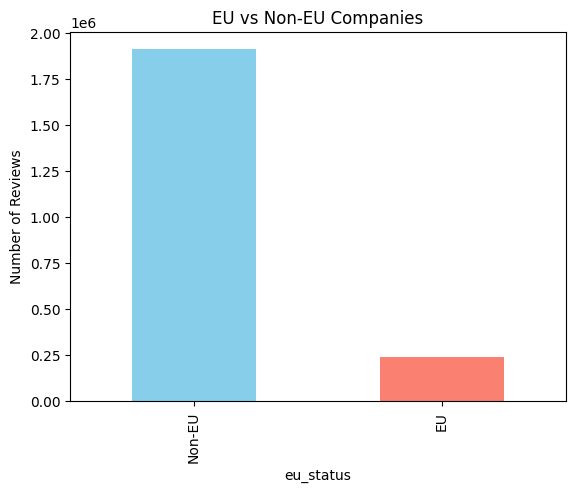

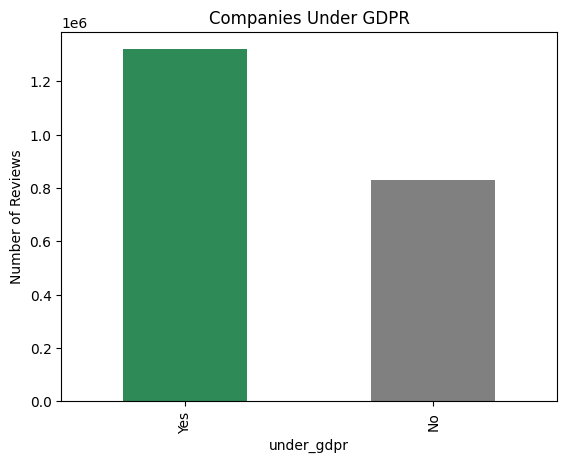

In [23]:
import matplotlib.pyplot as plt

# EU vs Non-EU plot
df_new['eu_status'].value_counts().plot(kind='bar', title='EU vs Non-EU Companies', color=['skyblue', 'salmon'])
plt.ylabel("Number of Reviews")
plt.show()

# GDPR Coverage plot
df_new['under_gdpr'].value_counts().plot(kind='bar', title='Companies Under GDPR', color=['seagreen', 'gray'])
plt.ylabel("Number of Reviews")
plt.show()


In [24]:
df_new.sample(5)

,rating,status,date,job,company_name,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,company_size,eu_status,founded_year,under_gdpr,industry,seniority_level,month,full_review
773821,5.0,Former Employee,2016-10-25,Anonymous Employee,Brigham Young University (BYU),1.0,1.0,1.0,Large,Non-EU,1875,No,Education,Senior,2016-10,Great Education and Great Employment It is a g...
627679,3.0,"Current Employee, more than 10 years",2017-06-25,Anonymous Employee,Macy's,1.0,-1.0,1.0,Large,Non-EU,1858,Yes,Retail,Senior,2017-06,Great Part-Time place to work 20% employee dis...
535629,5.0,Current Employee,2017-10-07,Anonymous Employee,GE,0.0,0.5,1.0,Large,Non-EU,1892,No,Electronics & Manufacturing,Senior,2017-10,"Engineer Brand, culture, work life balance has..."
1741020,5.0,"Current Employee, more than 3 years",2016-11-17,Anonymous Employee,Amazon,1.0,1.0,1.0,Large,Non-EU,1994,Yes,IT & Software,Mid-Level,2016-11,Network technicians Fun place to work at It ca...
259799,4.0,Former Employee,2017-11-01,Anonymous Employee,Aetna,-1.0,0.5,-1.0,Large,Non-EU,1853,No,Healthcare,Senior,2017-11,Analyst As Coventry Health Care: Open door pol...


In [5]:
# Convert everything to string first to handle all formats
df_new['founded_year'] = df_new['founded_year'].astype(str)

# Remove quotes and leading/trailing whitespaces
df_new['founded_year'] = df_new['founded_year'].str.replace('"', '').str.strip()

# Convert to numeric (coerce errors to NaN if unconvertible)
df_new['founded_year'] = pd.to_numeric(df_new['founded_year'], errors='coerce')

# Check the cleaned values
print(df_new['founded_year'].describe())


count    2.151491e+06
mean     1.937624e+03
std      5.962299e+01
min      1.096000e+03
25%      1.904000e+03
50%      1.957000e+03
75%      1.983000e+03
max      2.021000e+03
Name: founded_year, dtype: float64


##  ---------------------------- Propensity score matching ---------------------------------

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Step 1: Binary encode treatment
df_new['eu_status_binary'] = df_new['eu_status'].map({'EU': 1, 'Non-EU': 0})

# Step 2: Drop rows with missing data
psm_data = df_new.dropna(subset=[
    'company_size', 'founded_year', 'seniority_level',
    'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment', 'Recommmend_sentiment'  # sentiment variables
])

# Step 3: One-hot encode categorical covariates
psm_data = pd.get_dummies(psm_data, columns=['company_size', 'seniority_level'], drop_first=True)

# Step 4: Define covariates including sentiment
covariates = ['founded_year', 'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment', 'Recommmend_sentiment']
covariates += [col for col in psm_data.columns if 'company_size_' in col or 'seniority_level_' in col]

# Step 5: Fit logistic regression to get propensity scores
logit = LogisticRegression(max_iter=1000)
logit.fit(psm_data[covariates], psm_data['eu_status_binary'])

# Step 6: Add propensity scores to the DataFrame
psm_data['propensity_score'] = logit.predict_proba(psm_data[covariates])[:, 1]

# Step 7: Split into treated and control
treated = psm_data[psm_data['eu_status_binary'] == 1]
control = psm_data[psm_data['eu_status_binary'] == 0]

# Step 8: Nearest-neighbor matching (with replacement)
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])
matched_control = control.iloc[indices.flatten()]

# Step 9: Combine matched treated and control units
matched_df = pd.concat([treated.reset_index(drop=True), matched_control.reset_index(drop=True)])

# Optional: Save matched dataset
# matched_df.to_csv("propensity_matched_dataset.csv", index=False)


In [7]:
matched_df.sample(10)

,rating,status,date,job,company_name,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,eu_status,founded_year,under_gdpr,industry,month,full_review,eu_status_binary,company_size_Mid-Size,company_size_Small,seniority_level_Mid-Level,seniority_level_Senior,propensity_score
148783,4.0,Former Employee,2018-12-14,Anonymous Employee,The Goddard School,0.0,0.0,0.0,Non-EU,1988,No,Education,2018-12,Assistant Pre-K Teacher Being close with the s...,0,False,False,False,True,0.104540
156294,4.0,Current Employee,2018-05-22,Anonymous Employee,UC Santa Barbara,1.0,1.0,1.0,Non-EU,1944,No,Education,2018-05,Gaucho is a stupid mascot Study abroad is real...,0,False,False,False,True,0.109075
232133,4.0,"Current Employee, less than 1 year",2019-11-28,Team Leader,J D Wetherspoon,0.5,1.0,1.0,EU,1979,Yes,Other,2019-11,Team leader of bar staff Well run company with...,1,False,False,False,False,0.105454
113068,2.0,"Current Employee, more than 3 years",2019-04-05,Supply Chain Analyst,ALTEN,0.0,-1.0,0.0,EU,1988,Yes,Consulting & Business Services,2019-04,"Okish Reasonable salary, fllexible program, ba...",1,False,False,True,False,0.104540
237639,5.0,"Current Employee, more than 1 year",2019-07-19,Senior Customer Executive,Blue Yonder,1.0,1.0,1.0,EU,2008,Yes,IT & Software,2019-07,Great place to work Innovative leading supply ...,1,False,False,False,False,0.102535
34761,4.0,Current Employee,2019-03-13,Anonymous Employee,Arcadis,0.0,0.5,1.0,EU,1888,Yes,Construction & Engineering,2019-03,"Arcadis good terms, good family atmosphere, se...",1,False,False,False,True,0.115094
57541,1.0,"Former Employee, less than 1 year",2018-12-18,Customer Service Representative,EE,0.5,0.5,-1.0,EU,2010,Yes,Telecommunications,2018-12,Chicken coop call centre Nice colleagues to wo...,1,False,False,False,False,0.102336
137328,4.0,"Current Employee, more than 5 years",2018-04-25,Anonymous Employee,PA Consulting,0.5,0.5,1.0,EU,1943,Yes,Consulting & Business Services,2018-04,PA Work life balance and flexibility Leadershi...,1,False,False,False,True,0.109180
211911,4.0,"Former Employee, more than 1 year",2017-08-03,Senior Consultant,Capgemini,1.0,1.0,1.0,EU,1967,Yes,IT & Software,2017-08,Great Place to work for Awesome peers to work ...,1,False,False,False,False,0.106683
216650,5.0,"Current Employee, more than 5 years",2016-11-30,Researcher,Colorado State University,0.5,1.0,1.0,Non-EU,1870,No,Education,2016-11,Post Doc University environment is a great pla...,0,False,False,False,True,0.117090


C:\Users\Ethan D\AppData\Local\Temp\ipykernel_20316\3156333083.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=psm_data[psm_data['eu_status_binary'] == 1], x='propensity_score', label='Treated (Before)', shade=True)
C:\Users\Ethan D\AppData\Local\Temp\ipykernel_20316\3156333083.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=psm_data[psm_data['eu_status_binary'] == 0], x='propensity_score', label='Control (Before)', shade=True)


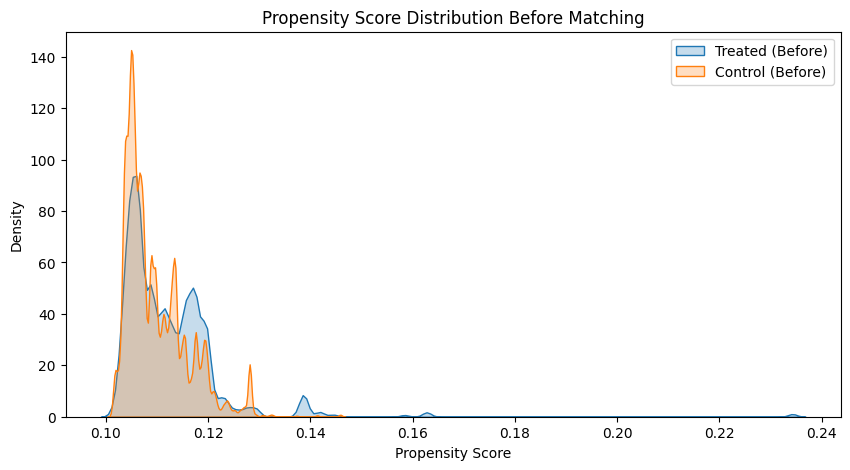

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.kdeplot(data=psm_data[psm_data['eu_status_binary'] == 1], x='propensity_score', label='Treated (Before)', shade=True)
sns.kdeplot(data=psm_data[psm_data['eu_status_binary'] == 0], x='propensity_score', label='Control (Before)', shade=True)

plt.title('Propensity Score Distribution Before Matching')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


C:\Users\Ethan D\AppData\Local\Temp\ipykernel_20316\4152388038.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=matched_df[matched_df['eu_status_binary'] == 1], x='propensity_score', label='Treated (After)', shade=True)
C:\Users\Ethan D\AppData\Local\Temp\ipykernel_20316\4152388038.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=matched_df[matched_df['eu_status_binary'] == 0], x='propensity_score', label='Control (After)', shade=True)


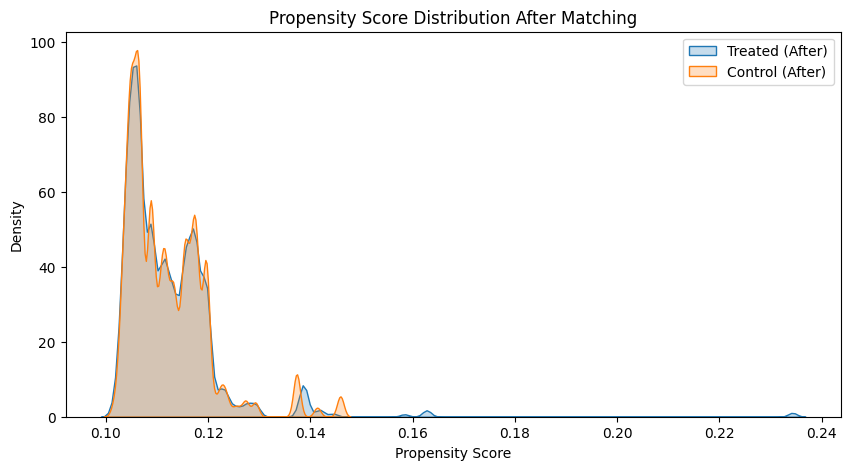

In [9]:
plt.figure(figsize=(10, 5))

sns.kdeplot(data=matched_df[matched_df['eu_status_binary'] == 1], x='propensity_score', label='Treated (After)', shade=True)
sns.kdeplot(data=matched_df[matched_df['eu_status_binary'] == 0], x='propensity_score', label='Control (After)', shade=True)

plt.title('Propensity Score Distribution After Matching')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


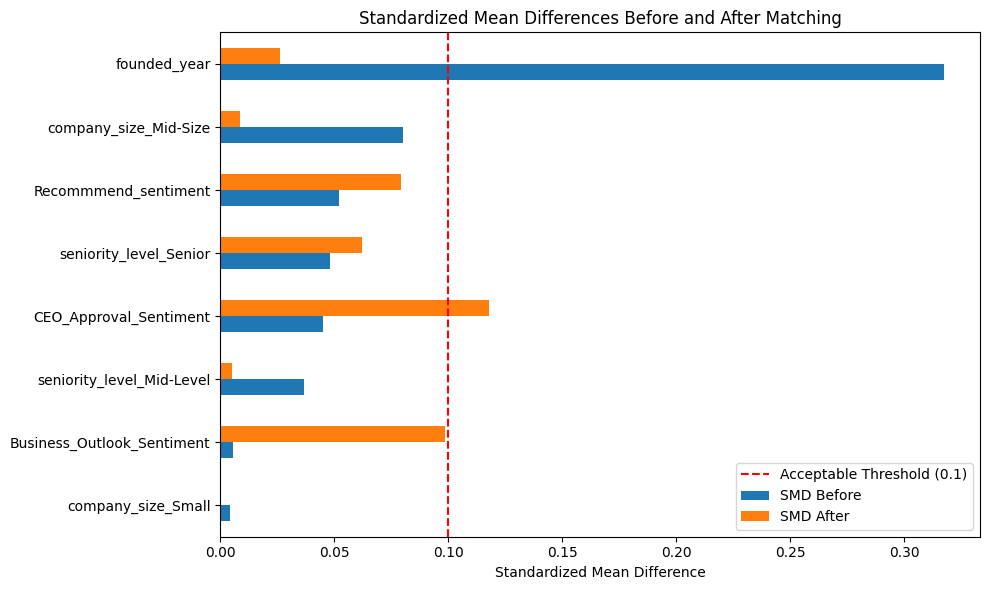

                            SMD Before  SMD After
Business_Outlook_Sentiment       0.005      0.099
CEO_Approval_Sentiment           0.045      0.118
Recommmend_sentiment             0.052      0.079
company_size_Mid-Size            0.080      0.009
company_size_Small               0.004      0.000
founded_year                     0.317      0.026
seniority_level_Mid-Level        0.037      0.005
seniority_level_Senior           0.048      0.062


In [11]:
import numpy as np

# Step 2: Add binary treatment indicator if not already present
if 'eu_status_binary' not in psm_data.columns:
    psm_data['eu_status_binary'] = psm_data['eu_status'].map({'EU': 1, 'Non-EU': 0})

if 'eu_status_binary' not in matched_df.columns:
    matched_df['eu_status_binary'] = matched_df['eu_status'].map({'EU': 1, 'Non-EU': 0})

# Step 3: Define covariates (include more as needed)
# This is a safe base list — feel free to add more
covariates = [
    'founded_year',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment',  # fix spelling if necessary
    'company_size_Mid-Size',
    'company_size_Small',
    'seniority_level_Mid-Level',
    'seniority_level_Senior'
]

# Step 4: Split treated/control groups pre- and post-matching
treated_full = psm_data[psm_data['eu_status_binary'] == 1]
control_full = psm_data[psm_data['eu_status_binary'] == 0]

treated_matched = matched_df[matched_df['eu_status_binary'] == 1]
control_matched = matched_df[matched_df['eu_status_binary'] == 0]

# Step 5: Safe SMD function
def compute_smd(treated, control, covariates):
    smd = {}
    for col in covariates:
        if col in treated.columns and col in control.columns:
            if pd.api.types.is_numeric_dtype(treated[col]) and pd.api.types.is_numeric_dtype(control[col]):
                treat_mean = treated[col].mean()
                control_mean = control[col].mean()
                pooled_std = np.sqrt((treated[col].var() + control[col].var()) / 2)
                smd[col] = np.abs(treat_mean - control_mean) / pooled_std if pooled_std != 0 else 0
    return pd.Series(smd).sort_values(ascending=False)

# Step 6: Compute SMDs
smd_before = compute_smd(treated_full, control_full, covariates)
smd_after = compute_smd(treated_matched, control_matched, covariates)

# Step 7: Combine and plot
smd_df = pd.DataFrame({
    'SMD Before': smd_before,
    'SMD After': smd_after
}).dropna().astype(float)

smd_df.sort_values("SMD Before", ascending=True).plot(kind='barh', figsize=(10, 6))
plt.axvline(0.1, color='red', linestyle='--', label='Acceptable Threshold (0.1)')
plt.title('Standardized Mean Differences Before and After Matching')
plt.xlabel('Standardized Mean Difference')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print or save
print(smd_df.round(3))
# smd_df.to_csv("smd_summary.csv", index=True)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the covariates used in matching
covariates = [
    'founded_year',
    'CEO_Approval_Sentiment',
    'Business_Outlook_Sentiment',
    'Recommmend_sentiment'
] + [col for col in matched_df.columns if 'company_size_' in col or 'seniority_level_' in col]

# Step 2: Re-split matched treated/control groups
treated_matched = matched_df[matched_df['eu_status_binary'] == 1]
control_matched = matched_df[matched_df['eu_status_binary'] == 0]

# Recreate full unmatched treated/control groups (from psm_data used before matching)
treated_full = psm_data[psm_data['eu_status_binary'] == 1]
control_full = psm_data[psm_data['eu_status_binary'] == 0]

# Step 3: Function to compute Standardized Mean Differences
def compute_smd(treated, control, covariates):
    smd = {}
    for col in covariates:
        if col in treated.columns and col in control.columns:
            if pd.api.types.is_numeric_dtype(treated[col]) and pd.api.types.is_numeric_dtype(control[col]):
                treat_mean = treated[col].mean()
                control_mean = control[col].mean()
                pooled_std = np.sqrt((treated[col].var() + control[col].var()) / 2)
                smd[col] = np.abs(treat_mean - control_mean) / pooled_std if pooled_std != 0 else 0
    return pd.Series(smd).sort_values(ascending=False)

# Step 4: Calculate SMDs
smd_before = compute_smd(treated_full, control_full, covariates)
smd_after = compute_smd(treated_matched, control_matched, covariates)

# Step 5: Combine into a DataFrame
smd_df = pd.DataFrame({
    'SMD Before': smd_before,
    'SMD After': smd_after
}).dropna().astype(float)

# Step 6: Plot the Love Plot
smd_df.sort_values("SMD Before", ascending=True).plot(
    kind='barh', figsize=(10, 6), color=['steelblue', 'darkorange']
)
plt.axvline(0.1, color='red', linestyle='--', label='Acceptable Threshold (0.1)')
plt.title('Standardized Mean Differences Before and After Matching')
plt.xlabel('Standardized Mean Difference')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print or save the results
print(smd_df.round(3))
# smd_df.to_csv("smd_summary.csv", index=True)


In [ ]:
## Matched df with  additional covariates to inlcude more companies 

In [15]:
#matched_df.to_csv("propensity_SMD_Proof_matched_dataset.csv", index=False)


In [13]:
# Number of total reviews before matching
n_reviews_before = len(psm_data)

# Number of unique companies before matching
n_companies_before = psm_data['company_name'].nunique()

# Number of total reviews after matching
n_reviews_after = len(matched_df)

# Number of unique companies after matching
n_companies_after = matched_df['company_name'].nunique()

# Display results
print("🔍 Before Matching:")
print(f"  Total reviews: {n_reviews_before}")
print(f"  Unique companies: {n_companies_before}")

print("\n✅ After Matching:")
print(f"  Total reviews: {n_reviews_after}")
print(f"  Unique companies: {n_companies_after}")


🔍 Before Matching:
  Total reviews: 2151491
  Unique companies: 1662

✅ After Matching:
  Total reviews: 476920
  Unique companies: 1018


In [14]:
# Means by group after matching
matched_means = matched_df.groupby('eu_status_binary')[covariates].mean().T
matched_means.columns = ['Non-EU (Control)', 'EU (Treated)']
print(matched_means.round(3))


                            Non-EU (Control)  EU (Treated)
founded_year                        1919.845      1917.845
CEO_Approval_Sentiment                 0.318         0.393
Business_Outlook_Sentiment             0.264         0.334
Recommmend_sentiment                   0.212         0.280
company_size_Mid-Size                  0.000         0.000
company_size_Small                     0.000         0.000
seniority_level_Mid-Level              0.143         0.145
seniority_level_Senior                 0.487         0.518


In [44]:
print(matched_df.columns)

Index(['rating', 'status', 'date', 'job', 'company_name',
       'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment',
       'Recommmend_sentiment', 'eu_status', 'founded_year', 'under_gdpr',
       'industry', 'month', 'full_review', 'eu_status_binary',
       'company_size_Mid-Size', 'seniority_level_Mid-Level',
       'seniority_level_Senior', 'propensity_score'],
      dtype='object')


## --------------------------------------Vader sentiment Scoring ---------------------------------

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Define a function to get compound sentiment score
def get_vader_score(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    else:
        return None  # In case there are NaNs or non-strings

# Apply to 'full_review' column
matched_df['vader_sentiment'] = matched_df['full_review'].apply(get_vader_score)


In [17]:
matched_df.sample(20)

,rating,status,date,job,company_name,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,eu_status,founded_year,...,industry,month,full_review,eu_status_binary,company_size_Mid-Size,company_size_Small,seniority_level_Mid-Level,seniority_level_Senior,propensity_score,vader_sentiment
208582,4.0,"Current Employee, more than 5 years",2018-08-09,Consultant,Capgemini,1.0,0.5,1.0,EU,1967,...,IT & Software,2018-08,My experience with Capgemini has been intrigui...,1,False,False,False,True,0.106683,0.8885
143174,5.0,"Current Employee, less than 1 year",2019-06-21,Administrative Assistant,Coty,1.0,0.5,1.0,Non-EU,1904,...,Beauty & Cosmetics,2019-06,"Great opportunity Positive environment, nice e...",0,False,False,False,False,0.113346,0.9638
200696,3.0,Current Employee,2016-09-12,Subdirector,Santander,1.0,1.0,1.0,EU,1857,...,Financial Services,2016-09,Subdirector Good work life balance depending o...,1,False,False,False,True,0.118550,0.9601
64023,2.0,"Former Employee, more than 1 year",2018-06-04,Anonymous Employee,Volunteers of America,0.5,0.5,-1.0,Non-EU,1896,...,Non-Profit,2018-06,"It's a paycheck, not a career Great co-workers...",0,False,False,False,False,0.114217,0.5583
29338,3.0,"Current Employee, more than 1 year",2018-06-14,Guest Advisor,GameStop,0.5,0.5,1.0,Non-EU,1984,...,Retail,2018-06,Guest Advisor -usually high moral with coworke...,0,False,False,False,False,0.104946,-0.8358
2590,4.0,"Current Employee, more than 5 years",2017-10-24,Engagement Director,CGI,1.0,1.0,1.0,EU,1976,...,IT & Software,2017-10,"Engagement Director Financially very strong, g...",1,False,False,False,True,0.105760,0.9076
70766,4.0,"Former Employee, more than 3 years",2016-10-08,Anonymous Employee,E.ON,1.0,1.0,1.0,EU,2000,...,Other,2016-10,great company to work for good company to work...,1,False,False,True,False,0.103333,0.9325
43691,1.0,"Current Employee, more than 5 years",2018-06-26,Business Development Manager,Lionbridge,-1.0,-1.0,-1.0,Non-EU,1996,...,IT & Software,2018-06,Business Development Good reputation. Decent b...,0,False,False,False,True,0.103734,-0.6055
99622,4.0,"Former Employee, less than 1 year",2019-10-07,Account Manager,Sage,0.5,0.5,1.0,EU,1981,...,IT & Software,2019-10,"Good British company Teamwork, good colleagues...",1,False,False,False,False,0.105250,0.7650
62092,5.0,"Former Employee, more than 1 year",2018-10-12,Office Management,Robert Bosch,0.5,0.5,1.0,EU,1886,...,Automotive,2018-10,"Bosch review This is a big company, good place...",1,False,False,False,False,0.115315,0.0701


In [18]:
matched_df.describe()
matched_df.describe(include='object')
print(matched_df['under_gdpr'].value_counts())
print(matched_df['eu_status'].value_counts())

print(matched_df['company_size_Mid-Size'].value_counts())
print(matched_df['seniority_level_Mid-Level'].value_counts())
print(matched_df['seniority_level_Senior'].value_counts())


under_gdpr
Yes    353845
No     123075
Name: count, dtype: int64
eu_status
EU        238460
Non-EU    238460
Name: count, dtype: int64
company_size_Mid-Size
False    476911
True          9
Name: count, dtype: int64
seniority_level_Mid-Level
False    408068
True      68852
Name: count, dtype: int64
seniority_level_Senior
True     239547
False    237373
Name: count, dtype: int64


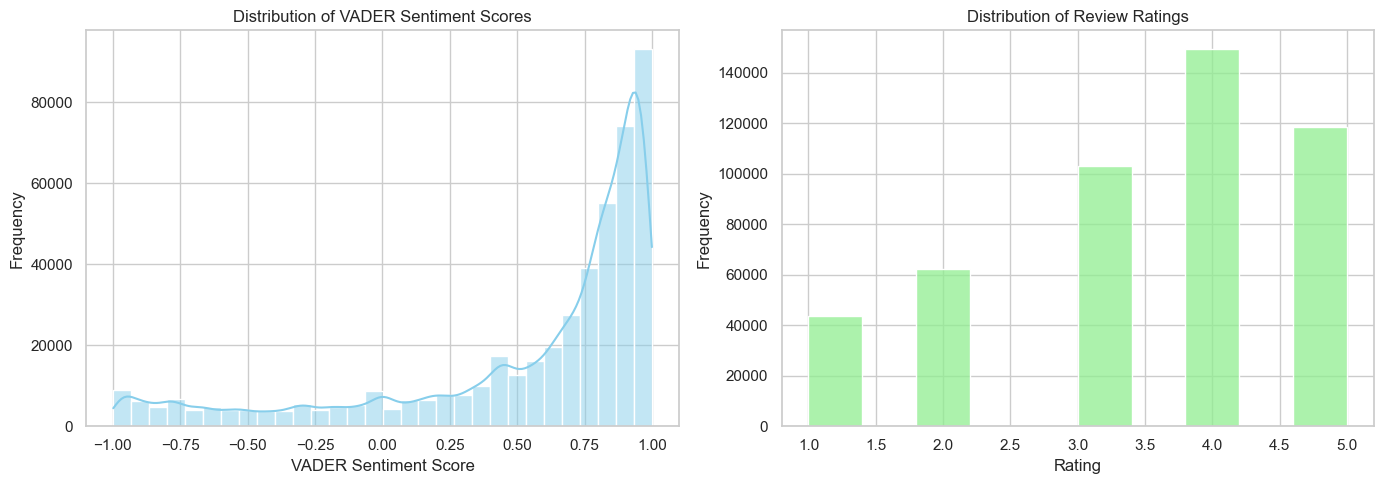

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot VADER Sentiment Distribution
sns.histplot(matched_df['vader_sentiment'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of VADER Sentiment Scores")
axes[0].set_xlabel("VADER Sentiment Score")
axes[0].set_ylabel("Frequency")

# Plot Rating Distribution
sns.histplot(matched_df['rating'], bins=10, kde=False, ax=axes[1], color='lightgreen')
axes[1].set_title("Distribution of Review Ratings")
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
correlation = matched_df[['vader_sentiment', 'rating']].corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                 vader_sentiment    rating
vader_sentiment         1.000000  0.503082
rating                  0.503082  1.000000


  eu_status  post_gdpr  vader_sentiment
0        EU      False         0.513634
1        EU       True         0.512984
2    Non-EU      False         0.608269
3    Non-EU       True         0.493832
  eu_status  post_gdpr      mean       std   count
0        EU      False  0.513634  0.515565  109092
1        EU       True  0.512984  0.502502  129368
2    Non-EU      False  0.608269  0.506575  142381
3    Non-EU       True  0.493832  0.616021   96079


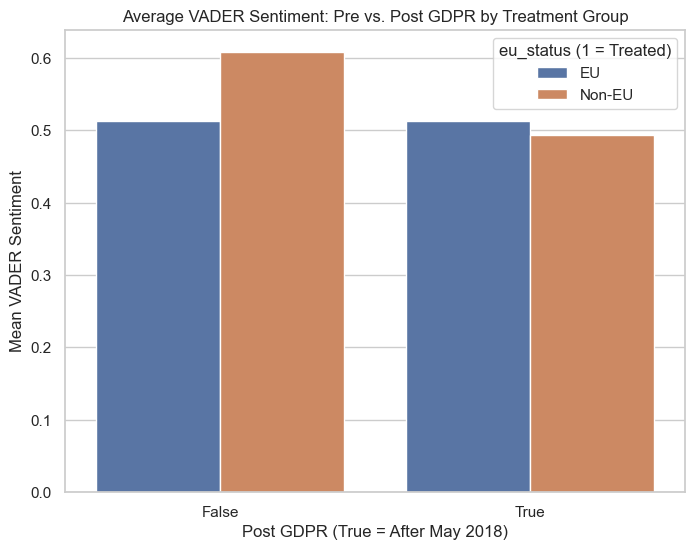

In [30]:
matched_df['post_gdpr'] = matched_df['date'] >= '2018-05-25'
grouped_sentiment = matched_df.groupby(['eu_status', 'post_gdpr'])['vader_sentiment'].mean().reset_index()
print(grouped_sentiment)

summary = matched_df.groupby(['eu_status', 'post_gdpr'])['vader_sentiment'].agg(['mean', 'std', 'count']).reset_index()
print(summary)

plt.figure(figsize=(8,6))
sns.barplot(data=summary, x='post_gdpr', y='mean', hue='eu_status')

plt.title("Average VADER Sentiment: Pre vs. Post GDPR by Treatment Group")
plt.xlabel("Post GDPR (True = After May 2018)")
plt.ylabel("Mean VADER Sentiment")
plt.legend(title="eu_status (1 = Treated)")
plt.show()


  under_gdpr  post_gdpr      mean       std   count
0         No      False  3.101633  1.447260   84707
1         No       True  3.327132  1.247691   35799
2        Yes      False  3.361193  1.271396  164156
3        Yes       True  3.540808  1.257756  175212


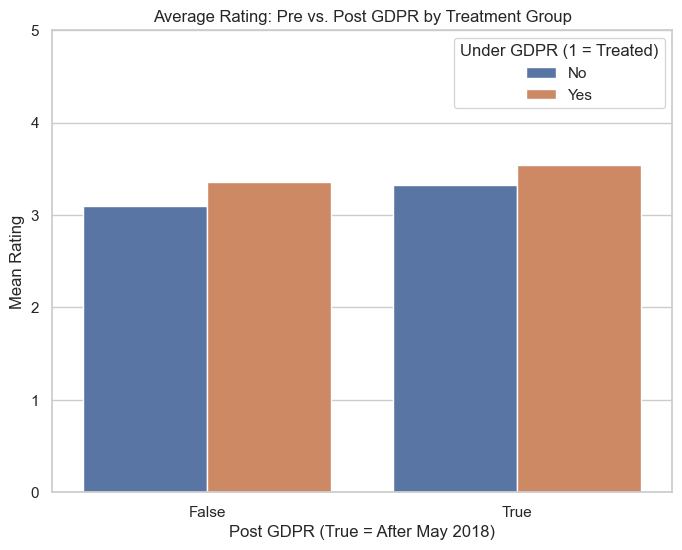

In [54]:
rating_summary = matched_df.groupby(['under_gdpr', 'post_gdpr'])['rating'].agg(['mean', 'std', 'count']).reset_index()
print(rating_summary)
plt.figure(figsize=(8,6))
sns.barplot(data=rating_summary, x='post_gdpr', y='mean', hue='under_gdpr')
plt.title("Average Rating: Pre vs. Post GDPR by Treatment Group")
plt.xlabel("Post GDPR (True = After May 2018)")
plt.ylabel("Average rating")
plt.legend(title="Under GDPR (1 = Treated)")
plt.ylim(0, 5)
plt.show()

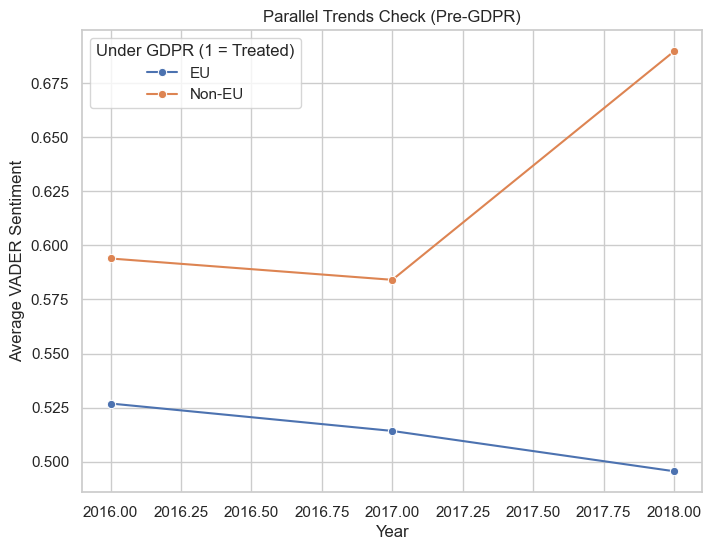

In [26]:

# Visual Test of Parallel Trends (Pre-GDPR Only)
matched_df['year'] = pd.to_datetime(matched_df['date']).dt.year

# Filter to pre-GDPR years
pre_gdpr_df = matched_df[matched_df['post_gdpr'] == 0]

# Group by year and GDPR status
pre_trends = pre_gdpr_df.groupby(['year', 'eu_status'])['vader_sentiment'].mean().reset_index()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.lineplot(data=pre_trends, x='year', y='vader_sentiment', hue='eu_status', marker='o')
plt.title("Parallel Trends Check (Pre-GDPR)")
plt.xlabel("Year")
plt.ylabel("Average VADER Sentiment")
plt.legend(title="Under GDPR (1 = Treated)")
plt.show()


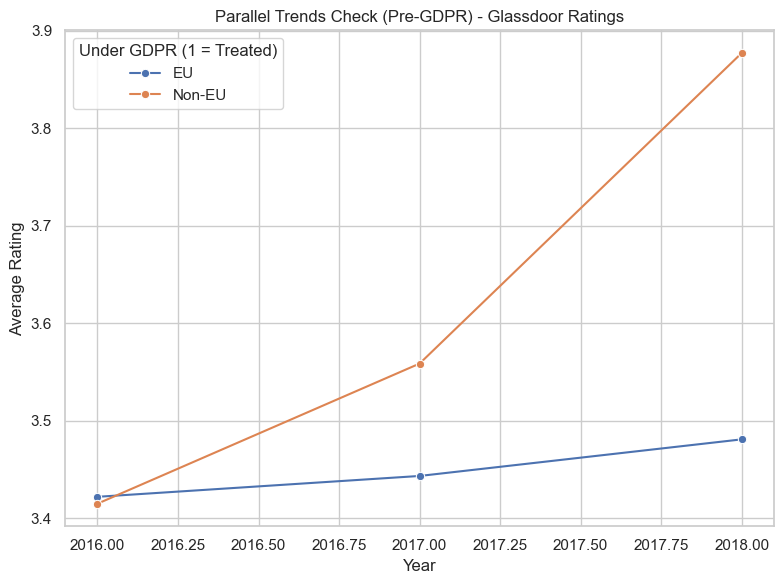

In [28]:
# Step 1: Extract year from the date
matched_df['year'] = pd.to_datetime(matched_df['date']).dt.year

# Step 2: Filter to pre-GDPR years only (assuming 'post_gdpr' is a binary indicator)
pre_gdpr_df = matched_df[matched_df['post_gdpr'] == 0]

# Step 3: Group by year and GDPR status, compute average ratings
pre_trends_rating = pre_gdpr_df.groupby(['year', 'eu_status'])['rating'].mean().reset_index()

# Step 4: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.lineplot(data=pre_trends_rating, x='year', y='rating', hue='eu_status', marker='o')
plt.title("Parallel Trends Check (Pre-GDPR) - Glassdoor Ratings")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(title="Under GDPR (1 = Treated)")
plt.tight_layout()
plt.show()


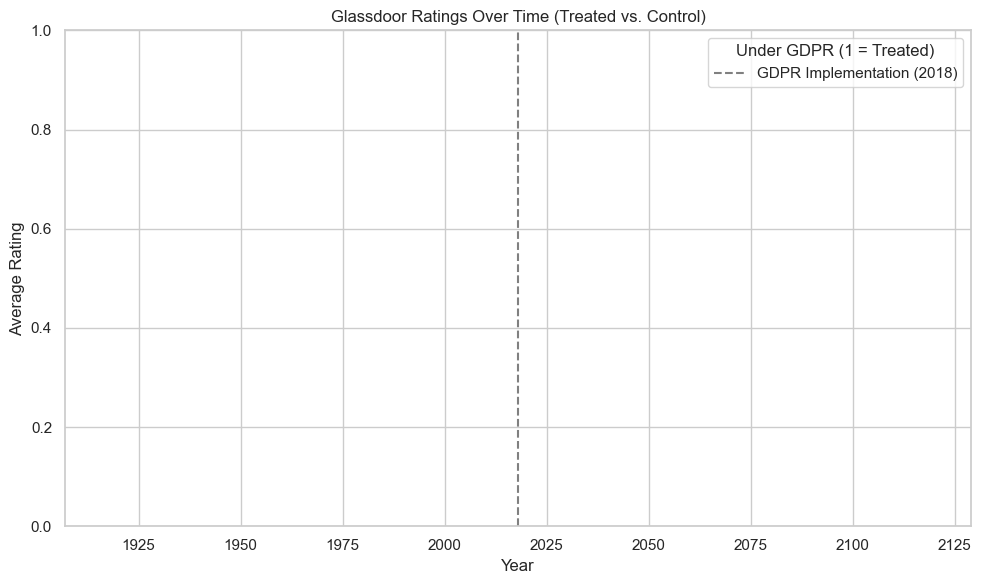

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'year' column is extracted
matched_df['year'] = pd.to_datetime(matched_df['date']).dt.year

# Group by year and GDPR status (includes pre and post)
rating_trends = matched_df.groupby(['year', 'eu_status'])['rating'].mean().reset_index()

# Convert 'under_gdpr' to readable label
rating_trends['eu_status'] = rating_trends['eu_status'].map({1: 'Yes', 0: 'No'})

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=rating_trends, x='year', y='rating', hue='eu_status', marker='o')
plt.axvline(x=2018, color='gray', linestyle='--', label='GDPR Implementation (2018)')
plt.title("Glassdoor Ratings Over Time (Treated vs. Control)")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(title="Under GDPR (1 = Treated)")
plt.tight_layout()
plt.show()


In [25]:
print(rating_trends.head())
print(rating_trends['year'].unique())


   year under_gdpr    rating
0  2016        NaN  3.630910
1  2016        NaN  3.313028
2  2017        NaN  3.568682
3  2017        NaN  3.478024
4  2018        NaN  3.354078
[2016 2017 2018 2019 2020]


In [86]:
# Start fresh
matched_df = matched_df.copy()
matched_df = matched_df.loc[:, ~matched_df.columns.str.startswith('year_')]

# Recreate relative year
matched_df['year'] = pd.to_datetime(matched_df['date']).dt.year
matched_df['gdpr_year'] = matched_df['year'] - 2018

# Create dummy variables for relative years (e.g., -2, -1, 0, 1, 2)
rel_years = [-2, -1, 0, 1, 2]
for yr in rel_years:
    col_name = f'year_m{abs(yr)}' if yr < 0 else f'year_{yr}'
    matched_df[col_name] = (matched_df['gdpr_year'] == yr).astype(int)
    matched_df[f'{col_name}_treated'] = matched_df[col_name] * matched_df['under_gdpr']


In [87]:
print(matched_df[[f'year_m2_treated', f'year_0_treated', f'year_1_treated']].sum())


year_m2_treated    YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...
year_0_treated     YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...
year_1_treated     YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesY...
dtype: object


In [88]:
# Convert under_gdpr to numeric (1 = Yes, 0 = No)
matched_df['under_gdpr'] = matched_df['under_gdpr'].map({'Yes': 1, 'No': 0})


In [89]:
matched_df.sample(20)


,rating,status,date,job,company_name,CEO_Approval_Sentiment,Business_Outlook_Sentiment,Recommmend_sentiment,eu_status,founded_year,...,year_m2,year_m2_treated,year_m1,year_m1_treated,year_0,year_0_treated,year_1,year_1_treated,year_2,year_2_treated
123650,4.0,"Current Employee, more than 5 years",2017-10-25,Sales Manager,Siemens Digital Industries Software,0.5,1.0,1.0,EU,1847.0,...,0,,1,Yes,0,,0,,0,
6258,5.0,Current Employee,2016-10-06,Associate Recruitment Consultant,Hays,1.0,1.0,1.0,EU,1968.0,...,1,Yes,0,,0,,0,,0,
23376,2.0,"Current Employee, more than 5 years",2017-12-05,Home Furnishings Consultant,Raymour and Flanigan,0.5,0.5,-1.0,Non-EU,1947.0,...,0,,1,No,0,,0,,0,
82958,3.0,Current Employee,2018-06-18,Learning Consultant,Ericsson Worldwide,0.5,1.0,-1.0,EU,1876.0,...,0,,0,,1,Yes,0,,0,
125954,4.0,Current Employee,2017-01-15,,Deutsche Bank,0.0,0.0,0.0,EU,1870.0,...,0,,1,Yes,0,,0,,0,
74491,4.0,Current Employee,2018-05-23,Anonymous Employee,NHS,0.0,0.0,0.0,EU,1948.0,...,0,,0,,1,Yes,0,,0,
203090,2.0,"Current Employee, more than 3 years",2018-01-29,Anonymous Employee,Capgemini,0.5,0.5,-1.0,EU,1967.0,...,0,,0,,1,Yes,0,,0,
107726,5.0,"Current Employee, more than 3 years",2019-09-15,Territory Manager,Shell,0.0,0.0,0.0,EU,1907.0,...,0,,0,,0,,1,Yes,0,
192120,5.0,"Current Employee, more than 1 year",2017-05-16,Anonymous Employee,Santander,1.0,1.0,1.0,EU,1857.0,...,0,,1,Yes,0,,0,,0,
193045,3.0,"Former Employee, less than 1 year",2018-10-07,Administrative,Santander,0.5,0.5,1.0,EU,1857.0,...,0,,0,,1,Yes,0,,0,


In [90]:
# Recreate relative year
matched_df['year'] = pd.to_datetime(matched_df['date']).dt.year
matched_df['gdpr_year'] = matched_df['year'] - 2018

# Define relative years for leads/lags
rel_years = [-2, -1, 0, 1, 2]
for yr in rel_years:
    col_name = f'year_m{abs(yr)}' if yr < 0 else f'year_{yr}'
    matched_df[col_name] = (matched_df['gdpr_year'] == yr).astype(int)
    matched_df[f'{col_name}_treated'] = matched_df[col_name] * matched_df['under_gdpr']


In [91]:
print(matched_df[[f'year_m2_treated', f'year_0_treated', f'year_1_treated']].sum())


year_m2_treated    44783
year_0_treated     94355
year_1_treated     86134
dtype: int64


                            OLS Regression Results                            
Dep. Variable:        vader_sentiment   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     873.9
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        19:35:14   Log-Likelihood:            -3.8661e+05
No. Observations:              459874   AIC:                         7.732e+05
Df Residuals:                  459868   BIC:                         7.733e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4963      0.002    3

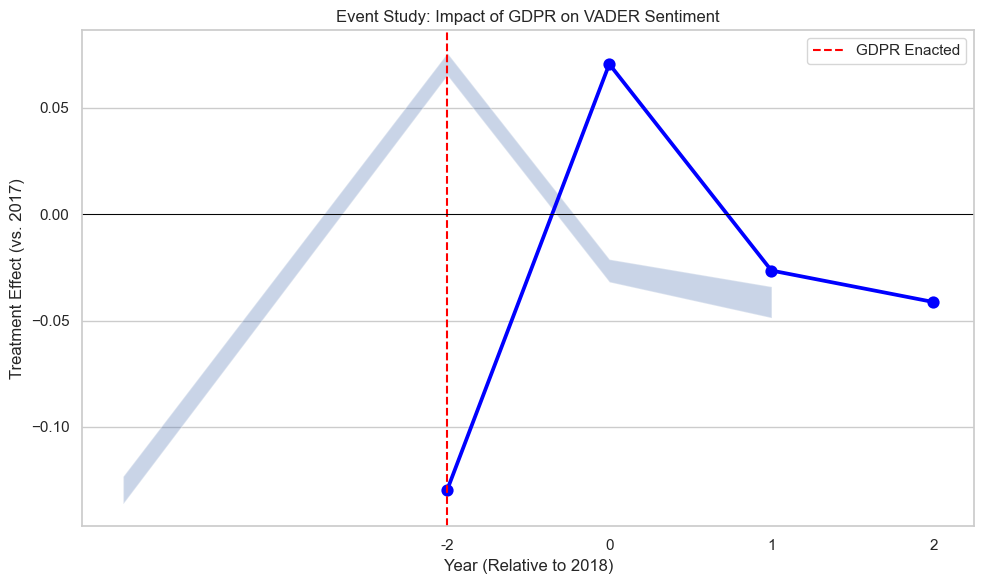

In [92]:
# STEP 1: Define event terms (excluding ref year_m1_treated)
event_terms = [col for col in matched_df.columns if col.endswith('_treated') and col != 'year_m1_treated']

# STEP 2: Fit the event study model
formula = 'vader_sentiment ~ ' + ' + '.join(event_terms) + ' + under_gdpr'
event_model = smf.ols(formula=formula, data=matched_df).fit()
print(event_model.summary())

# STEP 3: Plot coefficients with confidence intervals
coefs = event_model.params[event_terms]
conf_int = event_model.conf_int().loc[event_terms]
years = [int(term.split('_')[1].replace('m', '-')) for term in event_terms]

event_plot_df = pd.DataFrame({
    'year': years,
    'coef': coefs.values,
    'ci_low': conf_int[0].values,
    'ci_high': conf_int[1].values
}).sort_values('year')

# Plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=event_plot_df, x='year', y='coef', color='blue')
plt.fill_between(event_plot_df['year'], event_plot_df['ci_low'], event_plot_df['ci_high'], alpha=0.3)
plt.axvline(0, color='red', linestyle='--', label='GDPR Enacted')
plt.axhline(0, color='black', linewidth=0.7)
plt.title('Event Study: Impact of GDPR on VADER Sentiment')
plt.xlabel('Year (Relative to 2018)')
plt.ylabel('Treatment Effect (vs. 2017)')
plt.legend()
plt.tight_layout()
plt.show()

In [93]:
import statsmodels.formula.api as smf

# Ensure treatment and time indicators exist
matched_df['year'] = pd.to_datetime(matched_df['date']).dt.year
matched_df['post_gdpr'] = (matched_df['year'] >= 2018).astype(int)
matched_df['treated'] = matched_df['under_gdpr']  # already 1/0

# Interaction term for DiD
matched_df['post_treated'] = matched_df['post_gdpr'] * matched_df['treated']

# Convert categorical fixed effects
matched_df['firm'] = matched_df['company_name'].astype('category')
matched_df['year'] = matched_df['year'].astype('category')

# Estimate the model with fixed effects using C() for dummies
model_formula = 'vader_sentiment ~ post_treated + C(firm) + C(year)'
twfe_model = smf.ols(formula=model_formula, data=matched_df).fit()
print(twfe_model.summary())


                            OLS Regression Results                            
Dep. Variable:        vader_sentiment   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     545.6
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        19:38:38   Log-Likelihood:            -3.0599e+05
No. Observations:              459874   AIC:                         6.127e+05
Df Residuals:                  459508   BIC:                         6.168e+05
Df Model:                         365                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [100]:
# Clean column names
pre_df = pre_df.rename(columns={
    'company_size_Mid-Size': 'company_size_MidSize',
    'seniority_level_Mid-Level': 'seniority_level_MidLevel',
    'seniority_level_Senior': 'seniority_level_SeniorLevel'
})


In [116]:
import pandas as pd
import statsmodels.formula.api as smf

# Make sure year is numeric
matched_df['year'] = matched_df['year'].astype(int)

# Filter pre-treatment data
pre_df = matched_df[matched_df['year'] < 2018].copy()

# Relative event time
pre_df['event_year'] = pre_df['year'] - 2018

# Create dummies
dummies = pd.get_dummies(pre_df['event_year'], prefix='event')

# Rename for valid Python names
dummies.columns = [col.replace('-', 'm') for col in dummies.columns]

# Replace dashes with underscores in column names to avoid issues in formulas
pre_df.columns = pre_df.columns.str.replace('-', '_', regex=False)

# Merge
pre_df = pd.concat([pre_df, dummies], axis=1)

# Create interaction terms
interaction_cols = []
for col in dummies.columns:
    new_col = f'{col}_treated'
    pre_df[new_col] = dummies[col] * pre_df['under_gdpr']
    interaction_cols.append(new_col)

# Drop reference year (-1 → m1)
interaction_cols = [col for col in interaction_cols if 'event_m1_' not in col]

formula = (
    'vader_sentiment ~ year_m2_treated + year_m1_treated + year_0_treated + '
    'year_1_treated + year_2_treated + '
    'C(firm) + C(year) + C(industry) + '
    'company_size_Mid_Size + seniority_level_Mid_Level + seniority_level_Senior + '
    'CEO_Approval_Sentiment + Business_Outlook_Sentiment + Recommmend_sentiment + '
    'propensity_score'
)

# Run the regression on the pre-treatment subset
pre_model = smf.ols(formula=formula, data=pre_df).fit()

# Print the regression results
print(pre_model.summary())


                            OLS Regression Results                            
Dep. Variable:        vader_sentiment   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     781.9
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        22:16:16   Log-Likelihood:                -86388.
No. Observations:              191640   AIC:                         1.734e+05
Df Residuals:                  191307   BIC:                         1.768e+05
Df Model:                         332                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [117]:
print(pre_df.columns)

Index(['rating', 'status', 'date', 'job', 'company_name',
       'CEO_Approval_Sentiment', 'Business_Outlook_Sentiment',
       'Recommmend_sentiment', 'eu_status', 'founded_year', 'under_gdpr',
       'industry', 'month', 'full_review', 'eu_status_binary',
       'company_size_Mid_Size', 'seniority_level_Mid_Level',
       'seniority_level_Senior', 'propensity_score', 'vader_sentiment',
       'post_gdpr', 'year', 'gdpr_year', 'year_m2', 'year_m2_treated',
       'year_m1', 'year_m1_treated', 'year_0', 'year_0_treated', 'year_1',
       'year_1_treated', 'year_2', 'year_2_treated', 'treated', 'post_treated',
       'firm', 'event_year', 'event_m2', 'event_m1', 'event_m2_treated',
       'event_m1_treated'],
      dtype='object')


In [121]:
# Count number of reviews per firm
review_counts = matched_df['firm'].value_counts()

# Display top 10 firms with the most reviews
print(review_counts.head(50))


firm
Applied Materials                  8313
Canada Life                        7996
Capgemini                          7957
GameStop                           7841
Carnival                           7824
Siemens                            7415
CA Technologies                    7390
SAP                                6969
Halliburton                        6623
Bob Evans Restaurants              6343
CALVIN KLEIN                       6185
Tesco                              5769
Sun Life                           5746
Avon                               5578
Nokia                              5305
The Goddard School                 5090
Texas A&M University               4962
Robert Bosch                       4781
Manpower                           4505
Yale University                    4491
Colorado State University          4247
Petrofac                           4234
Vodafone                           4173
Ericsson Worldwide                 3906
Barclays                           

firm
PwC    1080
Name: count, dtype: int64


In [127]:
# Before matching
print(df['company_name'].value_counts())

# After matching
print(matched_df['company_name'].value_counts())


company_name
Amazon                            29680
Tata Consultancy Services         27952
Walmart                           27419
Cognizant Technology Solutions    23970
HP Inc                            22441
                                  ...  
Nando's                              44
Universitas Gadjah Mada              24
Self Opportunity                     18
BYJU S                               14
Walmart Canada                        1
Name: count, Length: 1662, dtype: int64
company_name
Applied Materials    8313
Canada Life          7996
Capgemini            7957
GameStop             7841
Carnival             7824
                     ... 
Zayo                  129
Klarna                128
Tek Experts           128
L'Oréal               105
Nando's                44
Name: count, Length: 361, dtype: int64
